In [1]:
using Plots 
using Flux

Based on [this](https://arxiv.org/pdf/1906.01563.pdf) paper. 

# Hamiltonian Mechanics 
Hamiltonian mechanics allows us to characterize the dynamics of a system in terms of it's generalized positions and momenta $(q^i, p_j)$. Given a Hamiltonian function (usually, a non-degenerate 2-form) $H$, the dynamics of the sytsem are given by the sett of coupled first order differential equations 
\begin{align}
    \dot{q}^i &= \frac{\partial H}{\partial p_i} \\ 
    \dot{p}_i &= -\frac{\partial H}{\partial q_i} \\ 
\end{align}
Hamiltonian mechanics is usefull is it allows us to describe the dynamics in terms of invariant quantities (usually we can interpret H as the total energy). This is easy to see in the differential-forms formulation (see Gravitation exercise 4.11) 
\begin{equation}
    \Theta \left( \quad , \frac{\partial \mathcal{P}}{\partial t}\right) = dH
\end{equation}
where $\Theta$ is the so called *symplectic 2-form* 
\begin{equation}
    \Theta = dp_i\wedge dq^i
\end{equation}

# Hamiltonian Neural Networks 
Notice that Hamilton's equations equate the partial derivatives of $H$ with respect to the inputs $(q^i, p_i)$ with their time derivatives $(\dot{q}^i, \dot{p}_i)$. Consider then an *encoder* $H:\mathbb{R}^{2n}\to\mathbb{R}$ which we want to learn the *Hamiltonian* function, i.e.

\begin{equation}
    H(q, p) \approx NN(q, p; \theta)
\end{equation}

Trained with the loss function 
\begin{equation}
\ell(\theta) = \left\Vert \frac{\partial H}{\partial p}-\dot{q} \right\Vert_2 + \left\Vert \frac{\partial H}{\partial q}+\dot{p} \right\Vert_2
\end{equation}

Here we take $(\dot{q}, \dot{p})$ as data and Neural Networks allow us to solve for $\partial{H}/\partial{q}$ and $\partial H/ \partial p$ for free (nearly) by backpropagation!

# Generating Test Data

In [2]:
using DifferentialEquations

# Simple Harmonic Oscillator 
\begin{equation}
    H = \frac{1}{2}kq^2 + \frac{1}{2m}p^2
\end{equation}

In [3]:
?HamiltonianProblem

search: HamiltonianProblem



```
HamiltonianProblem(H, p0, q0, tspan, param=nothing; kwargs...)
HamiltonianProblem((dp, dq), p0, q0, tspan, param=nothing; kwargs...)
```

Define a physical system by its Hamiltonian function `H(p, q, param)` or the function pair `dp = -∂H/∂q` and `dq = ∂H/∂p`.

The equations of motion are then given by `q̇ = ∂H/∂p = dq` and `ṗ  = -∂H/∂q = dp`.

The initial values for canonical impulses `p0` and coordinates `q0` may be scalars, `SArray`s or other `AbstractArray`s. Their type determines the type of functions `dp` and `dq`.

In the first two cases the derivative functions require the signatures `dp(p, q, param, t)` and `dq(p, q, param, t)` while in the latter case the partial derivatives use mutating signatures `dp!(Δp, p, q, param, t)` and `dq!(Δq, p, q, param, t)` with predefined arrays `Δp` and `Δq`.

If the Hamiltonian function is given, `dp` and `dq` are calculated automatically using AD (`ForwardDiff`).

!!! note



`H` may be defined with or without time as fourth argument. If both methods are defined, that with 4 arguments is used.


In [4]:
?ImplicitMidpoint

search: ImplicitMidpoint SImplicitMidpoint



ImplicitMidpoint: SDIRK Method   A second order A-stable symplectic and symmetric implicit solver.   Good for highly stiff equations which need symplectic integration.


In [5]:
H(q,p, param) = q^2 + p^2
p0=1.0
q0=0.0
tspan=(0.0, 10.0)
prob = HamiltonianProblem(H, p0, q0, tspan, dt=0.01)
sol = solve(prob, SymplecticEuler())

retcode: Success
Interpolation: 3rd order Hermite
t: 1001-element Vector{Float64}:
  0.0
  0.01
  0.02
  0.03
  0.04
  0.05
  0.060000000000000005
  0.07
  0.08
  0.09
  0.09999999999999999
  0.10999999999999999
  0.11999999999999998
  ⋮
  9.889999999999834
  9.899999999999833
  9.909999999999833
  9.919999999999833
  9.929999999999833
  9.939999999999833
  9.949999999999832
  9.959999999999832
  9.969999999999832
  9.979999999999832
  9.989999999999831
 10.0
u: 1001-element Vector{ArrayPartition{Float64, Tuple{Float64, Float64}}}:
 (1.0, 0.0)
 (0.9996, 0.02)
 (0.99880016, 0.039992)
 (0.997600799936, 0.0599680032)
 (0.9960023995520256, 0.07992001919872001)
 (0.9940055982082304, 0.09984006718976052)
 (0.9916111946251519, 0.11972017915392513)
 (0.9888201465642233, 0.13955240304642816)
 (0.985633570444669, 0.15932880597771262)
 (0.982052740896937, 0.179041477386606)
 (0.978079090252846, 0.19868253220454474)
 (0.973714207972654, 0.21824411400960167)
 (0.9689598400092728, 0.2377183981690547

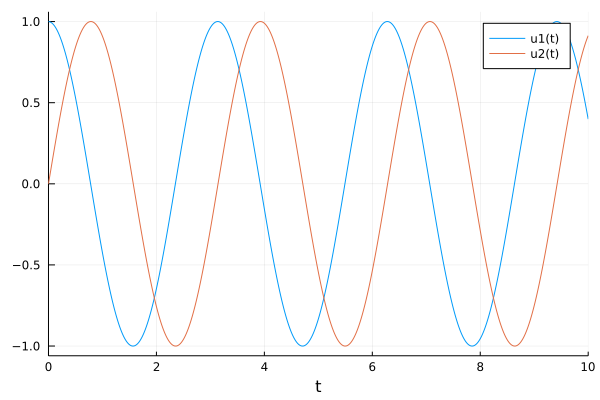

In [6]:
plot(sol)

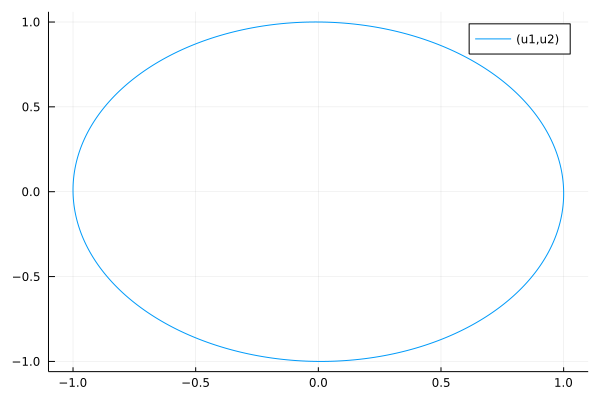

In [7]:
plot(sol, vars=(1,2))

Note thatt the diffeq solver for a `HamiltonianProblem` symplectic method (or used a DAE) to make sure the energy stays constant

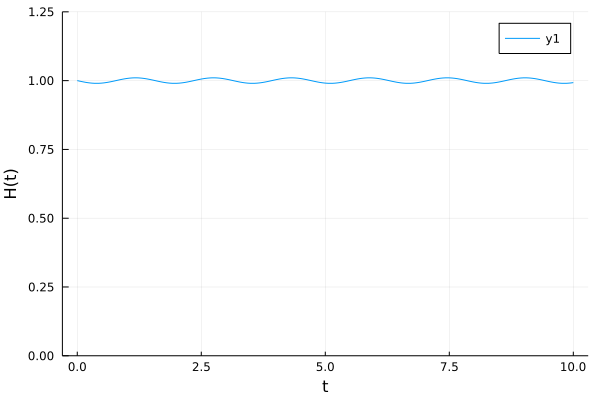

In [8]:
q = sol[1,:]
p = sol[2, :]
plot(sol.t, q.^2 .+ p.^2, xlabel="t", ylabel="H(t)", ylim=(0, 1.25))

Here we see that forcing the solver to use a symplectic integrator [like these](https://diffeq.sciml.ai/stable/solvers/dynamical_solve/#Symplectic-Integrators) results in a solution with bounded total energy (as opposed to exponential growth/decay). 

In [9]:
using ForwardDiff

In [10]:
testf(x, y) = x + y 
ForwardDiff.gradient(x->testf(x[1], x[2]), [1, 2])

2-element Vector{Int64}:
 1
 1

In [11]:
?ForwardDiff.gradient

```
ForwardDiff.gradient(f, x::AbstractArray, cfg::GradientConfig = GradientConfig(f, x), check=Val{true}())
```

Return `∇f` evaluated at `x`, assuming `f` is called as `f(x)`. The array `∇f` has the same shape as `x`, and its elements are `∇f[j, k, ...] = ∂f/∂x[j, k, ...]`.

This method assumes that `isa(f(x), Real)`.

Set `check` to `Val{false}()` to disable tag checking. This can lead to perturbation confusion, so should be used with care.


In [16]:
H(q,p) = q^2 + p^2

H (generic function with 2 methods)

In [17]:
function H_vec_field(q,p)
    dHdq, dHdp = ForwardDiff.gradient(x->H(x[1], x[2]), [q,p])
    qdot = dHdp 
    pdot = -dHdq
    return qdot, pdot # i.e. qdot = dHdp, pdot = -dHdq
end

H_vec_field(0.0, 1.0)

(2.0, -0.0)

In [18]:
println(H_vec_field(1, 1))
println(H_vec_field(-1, 1))
println(H_vec_field(-1, -1))
println(H_vec_field(1, -1))

(2, -2)
(2, 2)
(-2, 2)
(-2, -2)


visualize the Hamiltonian Vector field 

In [19]:
Q = [] 
P = [] 
Qdot = [] 
Pdot = [] 

span = -1.5:0.2:1.5
for q ∈ span, p∈ span
    qdot, pdot = H_vec_field(q, p)
    push!(Q, q) 
    push!(P, p) 
    push!(Qdot, qdot) 
    push!(Pdot, pdot)
end


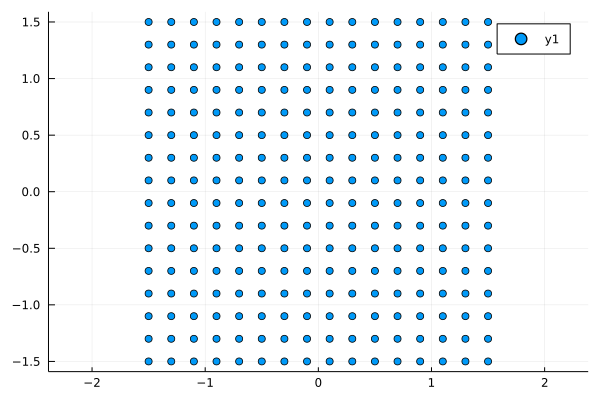

In [20]:
plt = plot(Q, P, seriestype=:scatter, aspect_ratio=1.0)

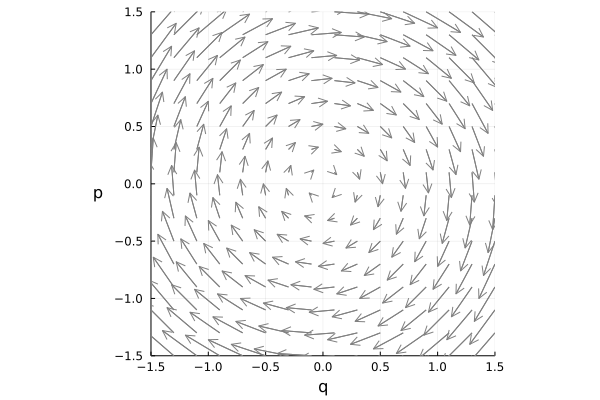

In [21]:
α = 0.1

p1 = quiver(Q, P, quiver=(α .* Qdot, α .* Pdot), aspect_ratio=1.0, color=:gray)
xlims!(p1, -1.5, 1.5)
ylims!(p1, -1.5, 1.5)
xlabel!(p1, "q")
ylabel!(p1, "p", yguidefontrotation=-90)

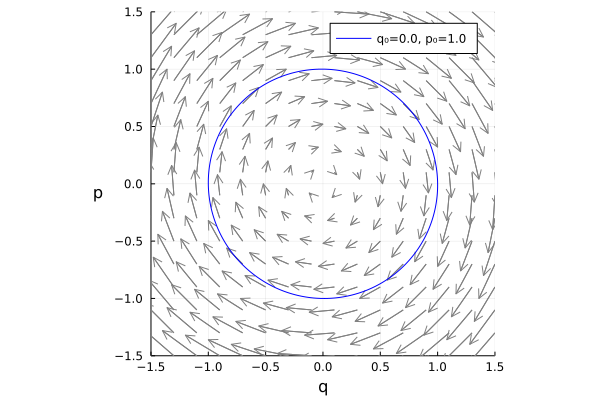

In [22]:
plot!(p1, sol[1,:], sol[2, :], color=:blue, label="q₀=0.0, p₀=1.0")

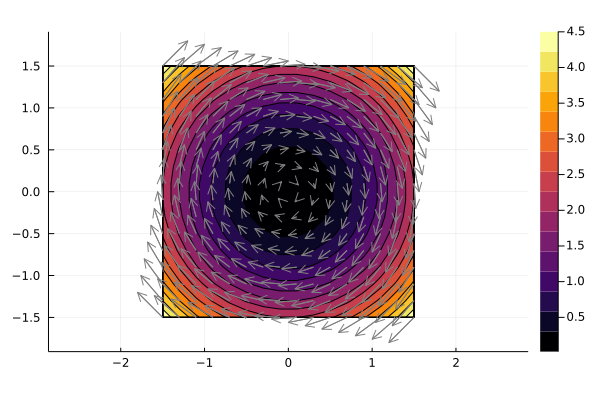

In [36]:
qs = -1.5:0.2:1.5
ps = -1.5:0.2:1.5
p1 = contour(qs, ps, H, fill=true)
quiver!(p1, Q, P, quiver=(α .* Qdot, α .* Pdot), aspect_ratio=1.0, color=:gray)
